In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:

df_enc = pd.read_csv("./Data/usedCleanedPre.csv")

df_enc = pd.get_dummies(df_enc)
X =  df_enc.drop(columns=['Cena', 'Godiste', 'Kilometraza'])
Y = df_enc['Cena']


X_train, X_test, y_train, y_test =train_test_split(X,Y,
                                                   test_size=0.3,
                                                   random_state=0)


In [7]:
df_enc

,Godiste,Kilometraza,Kubikaza,Snaga motora,Cena,prosek_god_km,Starost,Marka_Alfa Romeo,Marka_Audi,Marka_BMW,...,Km_cat_240000-250000,Km_cat_250000-260000,Km_cat_260000-270000,Km_cat_270000-280000,Km_cat_280000-290000,Km_cat_290000-300000,Km_cat_300000-310000,Km_cat_310000-320000,Km_cat_80000-90000,Km_cat_90000-100000
0,2015,194000,1.5,115,10900.000000,32333.333333,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2015,176000,1.5,115,10990.000000,29333.333333,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2015,197000,1.5,115,10290.000000,32833.333333,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2016,141000,1.5,115,12900.000000,28200.000000,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2015,250000,1.5,115,10500.000000,41666.666667,6,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26621,2015,187916,1.6,135,8503.423953,31319.333333,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26622,2015,184290,1.6,135,8990.000000,30715.000000,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26623,2015,164116,1.6,135,9250.000000,27352.666667,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26624,2015,164965,1.6,135,8763.423953,27494.166667,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



# Initialising the ANN
model = Sequential([
    tf.keras.layers.Dense(1024, input_dim = X_train.shape[1], kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Dense(512, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dense(256, kernel_initializer='normal', activation='relu'),
   # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dense(64, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Dense(32, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dense(16, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dense(1, kernel_initializer='normal', activation='linear'),
    
])

model.summary()

# Callbacks
checkpoint = ModelCheckpoint(filepath='linear_ann_polovni.h5', save_best_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=30, verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=20, mode='min')
epochs = 1000


# Compiling the ANN
model.compile(optimizer = 'rmsprop', loss = 'mean_absolute_error', metrics=['mean_absolute_error'])

# Fitting the ANN to the Training set
#model.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_split=0.3)
history = model.fit(
  X_train, y_train, batch_size = 64,
  validation_split=0.3,
  epochs=epochs,
  callbacks=[checkpoint, lr_reduce, early_stop]
)

y_pred = model.predict(X_test)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 1024)              163840    
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_51 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_52 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_53 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_54 (Dense)             (None, 32)               

204/204 [==============================] - 1s 7ms/step - loss: 239.3225 - mean_absolute_error: 239.3225 - val_loss: 281.5498 - val_mean_absolute_error: 281.5498
Epoch 39/1000
204/204 [==============================] - 2s 7ms/step - loss: 239.8725 - mean_absolute_error: 239.8725 - val_loss: 284.8644 - val_mean_absolute_error: 284.8644
Epoch 40/1000
204/204 [==============================] - 2s 7ms/step - loss: 237.8849 - mean_absolute_error: 237.8849 - val_loss: 292.6160 - val_mean_absolute_error: 292.6160
Epoch 41/1000
204/204 [==============================] - 1s 7ms/step - loss: 236.2677 - mean_absolute_error: 236.2677 - val_loss: 283.2404 - val_mean_absolute_error: 283.2404
Epoch 42/1000
204/204 [==============================] - 1s 7ms/step - loss: 232.3218 - mean_absolute_error: 232.3218 - val_loss: 294.7782 - val_mean_absolute_error: 294.7782
Epoch 43/1000
204/204 [==============================] - 2s 7ms/step - loss: 229.9757 - mean_absolute_error: 229.9757 - val_loss: 285.7485 

204/204 [==============================] - 1s 7ms/step - loss: 176.4331 - mean_absolute_error: 176.4331 - val_loss: 262.3557 - val_mean_absolute_error: 262.3557
Epoch 85/1000
204/204 [==============================] - 2s 7ms/step - loss: 176.2624 - mean_absolute_error: 176.2624 - val_loss: 259.3815 - val_mean_absolute_error: 259.3815
Epoch 86/1000
204/204 [==============================] - 1s 7ms/step - loss: 175.2842 - mean_absolute_error: 175.2842 - val_loss: 270.4915 - val_mean_absolute_error: 270.4915
Epoch 87/1000
204/204 [==============================] - 1s 7ms/step - loss: 176.0798 - mean_absolute_error: 176.0798 - val_loss: 257.6473 - val_mean_absolute_error: 257.6473
Epoch 88/1000
204/204 [==============================] - 1s 7ms/step - loss: 174.8628 - mean_absolute_error: 174.8628 - val_loss: 257.3380 - val_mean_absolute_error: 257.3380
Epoch 89/1000
204/204 [==============================] - 2s 7ms/step - loss: 174.2581 - mean_absolute_error: 174.2581 - val_loss: 257.5493 

Epoch 130/1000
204/204 [==============================] - 2s 7ms/step - loss: 164.3055 - mean_absolute_error: 164.3055 - val_loss: 254.2681 - val_mean_absolute_error: 254.2681
Epoch 131/1000
204/204 [==============================] - 1s 7ms/step - loss: 167.2878 - mean_absolute_error: 167.2878 - val_loss: 254.2556 - val_mean_absolute_error: 254.2556
Epoch 132/1000
204/204 [==============================] - 1s 7ms/step - loss: 165.1521 - mean_absolute_error: 165.1521 - val_loss: 254.4900 - val_mean_absolute_error: 254.4900
Epoch 133/1000
204/204 [==============================] - 2s 7ms/step - loss: 165.0983 - mean_absolute_error: 165.0983 - val_loss: 254.1145 - val_mean_absolute_error: 254.1145
Epoch 134/1000
204/204 [==============================] - 1s 7ms/step - loss: 166.2233 - mean_absolute_error: 166.2233 - val_loss: 254.0912 - val_mean_absolute_error: 254.0912
Epoch 135/1000
204/204 [==============================] - 2s 7ms/step - loss: 164.9186 - mean_absolute_error: 164.9186 -

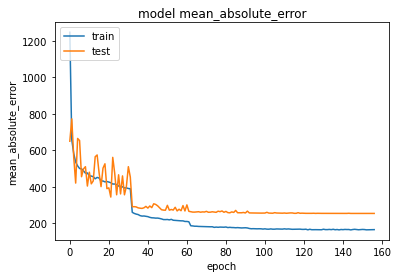

In [18]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

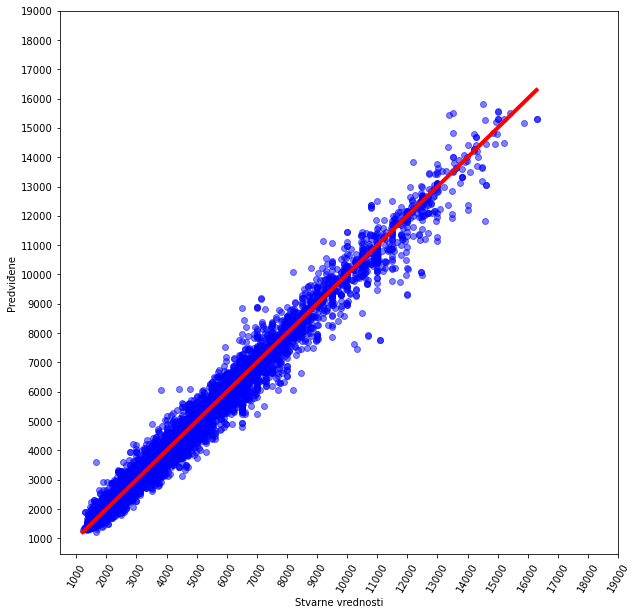

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, color='blue', edgecolors=(0, 0, 1),alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=4,color='Red')
plt.xlabel('Stvarne vrednosti')
plt.xticks(np.arange(1000, 20000, 1000), rotation=60)
plt.yticks(np.arange(1000, 20000, 1000))
plt.ylabel('Predviđene')
plt.show()

In [38]:
model = load_model('linear_ann_polovni.h5')

In [39]:
parameters = ['Alfa Romeo', '147', 'Hecbek', 'Dizel', 1.6, 105, 'Euro 3 ', 'Prednji ', 'Manuelni 5 brzina ', 'Automatska klima ', 'Bela', 'Drugi', 12073.0, 17, '200000-210000']

In [40]:
cars = pd.read_csv("./Data/usedCleanedPre.csv")
df_enc = cars.drop(columns=['Cena', 'Godiste','Kilometraza'])
df_enc = pd.get_dummies(df_enc)
columns = ['Marka', 'Model','Karoserija', 'Gorivo', 'Kubikaza','Snaga motora', 'EKM' ,'Pogon',
           'Menjac', 'Klima','Boja', 'Materijal enterijera', 'prosek_god_km','Starost', 'Km_cat']
params = [[k] for k in parameters]



params = dict(zip(columns, params))

df1 = pd.get_dummies(pd.DataFrame(params))


dummies_frame = df_enc
df1 = df1.reindex(columns = dummies_frame.columns, fill_value=0)

value = sc.transform(np.array(df1.iloc[0].values).reshape((1,-1)))

#value = np.array(df1.iloc[0].values).reshape((1,-1))


In [41]:
price = model.predict(value).astype(float)

In [42]:
price

array([[54779992.]])